In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
import time
warnings.filterwarnings('ignore')

# Load CSV files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file paths for training and testing datasets
train_file_path = '/content/drive/My Drive/IDS Dataset 2/NF-ToN-IoT-V2_15000 samples_minmax_normalized_train.csv'
test_file_path = '/content/drive/My Drive/IDS Dataset 2/NF-ToN-IoT-V2_15000 samples_minmax_normalized_test.csv'

# Load the datasets into DataFrames
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Separate features and labels for training and testing datasets
X_train = train_data.iloc[:, :-2]  # All columns except the last two (labels)
y_train = train_data.iloc[:, -1]    # Last column (label names)

X_test = test_data.iloc[:, :-2]     # All columns except the last two (labels)
y_test = test_data.iloc[:, -1]       # Last column (label names)

Mounted at /content/drive


Attack
Benign        3270
scanning      2722
xss           2235
ddos          1645
password       930
injection      601
dos            585
backdoor        13
mitm             5
ransomware       4
Name: count, dtype: int64


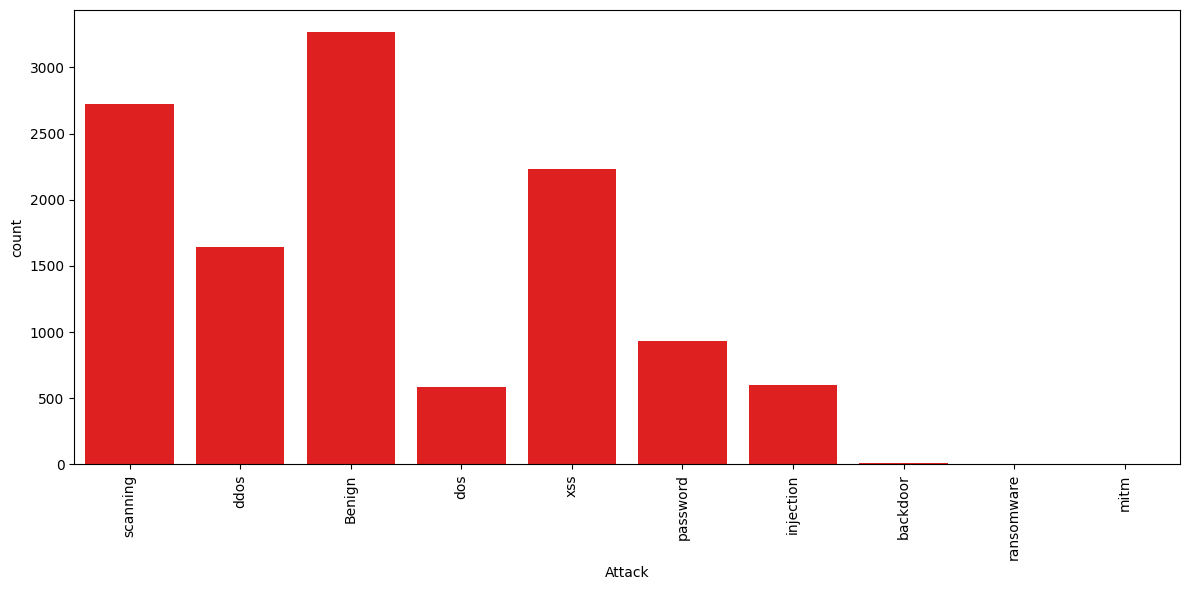

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

X = train_data.drop(['Attack'], axis=1)
y = train_data.loc[:, 'Attack']
print(train_data.loc[:, 'Attack'].value_counts())

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.countplot(data=train_data, x='Attack', color='red')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [3]:
X_train_nan_count = X_train.isna().sum().sum()
X_test_nan_count = X_test.isna().sum().sum()

print("Number of NaN values in X_train:", X_train_nan_count)
print("Number of NaN values in X_test:", X_test_nan_count)
print("Number of fearures:", X_train.shape[1])

Number of NaN values in X_train: 0
Number of NaN values in X_test: 0
Number of fearures: 41


In [4]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

# Start time
start_time = time.time()

y_pred_NB = NB.predict(X_test)

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution time for Naive Bayes classifier: {execution_time:.5f} seconds")

y_pred_NB

Execution time for Naive Bayes classifier: 0.02767 seconds


array(['dos', 'scanning', 'password', ..., 'scanning', 'scanning',
       'Benign'], dtype='<U10')

In [5]:
#Compare actual y test V.S y_predict
df_rep_svc = pd.DataFrame({'actual data':y_test, 'predicted data':y_pred_NB})
df_rep_svc.head(10)

,actual data,predicted data
0,xss,dos
1,scanning,scanning
2,password,password
3,password,scanning
4,scanning,scanning
5,Benign,scanning
6,Benign,scanning
7,password,scanning
8,scanning,scanning
9,Benign,scanning


In [6]:
# Import necessary libraries
import os
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path for the model and the folder name
model_folder = '/content/drive/My Drive/IDS models'
model_filename = 'NF-ToN-IoT-V2_Naive_Bayes.pkl'
model_path = os.path.join(model_folder, model_filename)

# Create the folder if it doesn't exist
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Save the model to the specified path
joblib.dump(NB, model_path)

print(f'Model saved successfully at: {model_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully at: /content/drive/My Drive/IDS models/NF-ToN-IoT-V2_Naive_Bayes.pkl


Text(0.5, 1.0, 'Confusion Matrix')

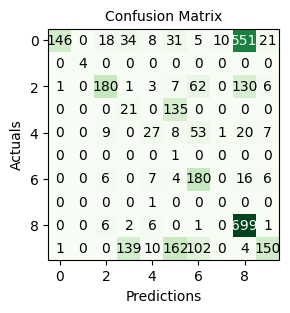

In [7]:
from mlxtend.plotting import plot_confusion_matrix
conf_NB = confusion_matrix(y_test,y_pred_NB)
fig, ax = plot_confusion_matrix(conf_mat=conf_NB,figsize=(3,3), cmap=plt.cm.Greens)

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score

score_NB = cross_val_score(NB,X_train,y_train,cv=10,scoring='recall_weighted')
avg_scores_NB = score_NB.mean()
scores_NB_test = cross_val_score(NB, X_test, y_test ,cv = 10, scoring = 'recall_weighted')
avg_scores_NB_test = scores_NB_test.mean()
print("Train score is:",format(avg_scores_NB))
print("Test score is:",format(avg_scores_NB_test))

Train score is: 0.4639467110741049
Test score is: 0.5414706533776301
